#Ejercicio regresion logistica datasets(Mercadeo Bancario)

##1)Cargando las librerias

In [4]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

##2) Cargando los datos

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/2HenryCardenas1/DeepLearning/main/Databasets/mercadeo_bancario.csv")
df.head(5)


,edad,trabajo,estado_civil,educacion,total_hijos,credito_sin_pago,prestamo_vivienda,prestamo_personal,valor_prestamo,dias_ultimo_pago,tarjetas_credito,contacto,mes,dia_semana,duracion_ultimo_contacto,dias_ultimo_contacto,anterior_contacto,numero_empleados,si_no
0,44,blue-collar,married,preschool,7,unknown,yes,no,268017,0,5,cellular,aug,thu,210,43,0,88,0
1,53,technician,married,unknown,1,no,no,no,0,0,0,cellular,nov,fri,138,0,0,14,0
2,28,management,single,university.degree,3,no,yes,no,308036,0,0,cellular,jun,thu,339,27,2,1993,1
3,39,services,married,Technological_school,1,no,no,no,0,0,4,cellular,apr,fri,185,0,0,1338,0
4,55,retired,married,preschool,2,no,yes,no,249888,0,4,cellular,aug,fri,137,2,1,1184,1


##3)Conociendo los datos

In [106]:
df.shape

(41188, 19)

###Verificando si hay datos nulos

In [107]:
df.isnull().sum()

edad                        0
trabajo                     0
estado_civil                0
educacion                   0
total_hijos                 0
credito_sin_pago            0
prestamo_vivienda           0
prestamo_personal           0
valor_prestamo              0
dias_ultimo_pago            0
tarjetas_credito            0
contacto                    0
mes                         0
dia_semana                  0
duracion_ultimo_contacto    0
dias_ultimo_contacto        0
anterior_contacto           0
numero_empleados            0
si_no                       0
dtype: int64

##4)Graficando los datos del dataset


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


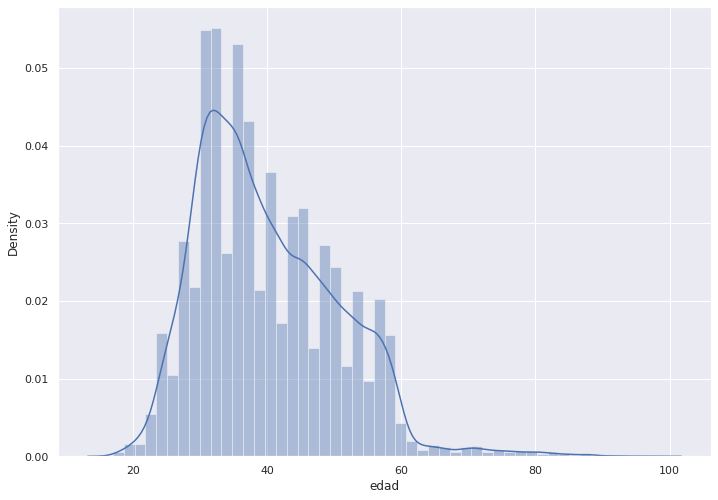

In [108]:
sns.set(rc={'figure.figsize':(11.7,8.27)})  #tamaño del grafico
sns.distplot(df['edad'])                #agregamos los datos
plt.show()

##5)Primero pasamos los valores de texto a numeros para poder realizar el entrenamiento

###Buscamos los valores unicos en cada columna

In [ ]:
df.info()

In [ ]:
df["trabajo"].unique()

In [102]:
df['estado_civil '].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [ ]:
df['educacion'].unique()

In [ ]:
df['credito_sin_pago'].unique()

In [ ]:
df['prestamo_vivienda'].unique()

In [ ]:
df['prestamo_personal'].unique()

In [ ]:
df['contacto'].unique()

In [ ]:
df['mes'].unique()

In [83]:
df['dia_semana'].unique()

array(['thu', 'fri', 'tue', 'mon', 'wed'], dtype=object)

###Le indicamos que valores van a tener 

In [6]:
valores_trabajo = {'trabajo':{'blue-collar':1, 'technician':2, 'management':3, 'services':4, 'retired':5,
       'admin.':6, 'housemaid':7, 'unemployed':8, 'entrepreneur':9,
       'self-employed':10, 'unknown':11, 'student':12 }}

valores_estado_civil = {'estado_civil ':{'married':1, 'single':2, 'divorced':3, 'unknown':4}}

valores_educacion = {'educacion':{'preschool':1, 'unknown':2, 'university.degree':3,
       'Technological_school':4, 'tecnical_school':5, 'professional.course':6,
       'primary_school':7, 'illiterate':8}}   

valores_credito_sin_pago = {'credito_sin_pago':{'unknown':0, 'no':1, 'yes':2}} 

valores_prestamo_vivienda = {'prestamo_vivienda':{'yes':2, 'no':1, 'unknown':0}}          

valores_prestamo_personal = {'prestamo_personal':{'yes':2, 'no':1, 'unknown':0}}  

valores_contacto = {'contacto':{'cellular':0, 'telephone':1}}

valores_mes = {'mes':{'aug':8, 'nov':11, 'jun':6, 'apr':4, 'jul':6, 'may':5, 'oct':10, 'mar':3, 'sep':9,
       'dec':12}}

valores_dia_semana = {'dia_semana':{'thu':4, 'fri':5, 'tue':2, 'mon':1, 'wed':3}}       





Aca le decimos que me remplace los datos creados arriba en nuestro dataframe

In [7]:
df.replace(valores_trabajo,inplace=True)
df.replace(valores_estado_civil,inplace=True)
df.replace(valores_educacion,inplace=True)
df.replace(valores_credito_sin_pago,inplace=True)
df.replace(valores_prestamo_vivienda,inplace=True)
df.replace(valores_prestamo_personal,inplace=True)
df.replace(valores_contacto,inplace=True)
df.replace(valores_mes,inplace=True)
df.replace(valores_dia_semana,inplace=True)

df

,edad,trabajo,estado_civil,educacion,total_hijos,credito_sin_pago,prestamo_vivienda,prestamo_personal,valor_prestamo,dias_ultimo_pago,tarjetas_credito,contacto,mes,dia_semana,duracion_ultimo_contacto,dias_ultimo_contacto,anterior_contacto,numero_empleados,si_no
0,44,1,1,1,7,0,2,1,268017,0,5,0,8,4,210,43,0,88,0
1,53,2,1,2,1,1,1,1,0,0,0,0,11,5,138,0,0,14,0
2,28,3,2,3,3,1,2,1,308036,0,0,0,6,4,339,27,2,1993,1
3,39,4,1,4,1,1,1,1,0,0,4,0,4,5,185,0,0,1338,0
4,55,5,1,1,2,1,2,1,249888,0,4,0,8,5,137,2,1,1184,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,5,1,4,5,0,1,2,280875,0,0,1,6,4,222,33,0,664,0
41184,31,7,1,1,1,0,1,1,0,0,4,1,5,4,196,0,0,736,0
41185,42,6,2,3,1,2,2,2,138636,89,3,1,5,3,62,46,0,43,0
41186,48,2,1,6,4,2,1,2,138176,72,4,1,10,2,200,19,0,1068,0


##6)Aca iniciamos la separacion de los datos para el entrenamiento

In [8]:
x = df.drop(columns='si_no')
y = df.si_no

#La maquina deja de funcionar :(
"""x = df.drop(columns='si_no')
y = df.valor_prestamo"""

"x = df.drop(columns='si_no')\ny = df.valor_prestamo"

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=4,test_size=0.2)

In [10]:
#Creamos una instancia de la Regresión Logística
regresion_logistica = LogisticRegression()

##7)Entrenando

In [11]:
#Reemplazar datos de toda una columna en una data frame
"""df['trabajo'].replace(to_replace="[a-zA-Z]", value='1', 
regex=True, inplace=True)"""

#entrenando modelo de regresión logistica
regresion_logistica.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

##8)Haciendo predicciones

In [12]:
#usaremos el 20% de los datos para probar el modelo
#ejecutamos la predicción con datos de prueba (x_test)
y_prediccion = regresion_logistica.predict(x_test)

##9)Generando probabilidades

In [13]:
#comparamos los datos de predicción (y_prediccion) VS los datos de prueba (y_test)
exactitud = metrics.accuracy_score(y_test, y_prediccion)
print("exactitud_porcentaje= "+str(100 * exactitud))

exactitud_porcentaje= 89.1964068948774
